### HACKtheMACHINE 2019

In [9]:
#Import Libraries (seaborn,matplotlib,pandas,numpy,math,sklearn,tensorflow,keras,sys,os,warnings)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import * #from numpy import reshape 
from math import *

#scikit-learn libraries
import sklearn.gaussian_process as gp
import sklearn.preprocessing
import sklearn.decomposition
import sklearn.cross_decomposition
import sklearn.neighbors
import sklearn.model_selection
import sklearn.metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder,RobustScaler
from sklearn.preprocessing import *
from sklearn.cluster import DBSCAN
 
#Tensorflow and keras libraries
import tensorflow,keras
import tensorflow as tf
import keras.utils.np_utils
import keras.preprocessing.sequence
import keras.optimizers
import keras.backend as K
import keras.callbacks
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,TimeDistributed,LeakyReLU,BatchNormalization
from keras.layers import Embedding,Bidirectional
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D,AveragePooling1D,LSTM
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau    
from keras import optimizers
from numpy import reshape
from numpy.random import seed
from tensorflow import set_random_seed


import sys
import os.path

import seaborn as sns 

from sklearn.ensemble import RandomForestClassifier

#ARC GIS
from arcgis import *

#Cluster analysis
from sklearn.cluster import DBSCAN
            

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10,6
import warnings
warnings.filterwarnings("ignore")

import geopy
from geopy.distance import great_circle, vincenty


from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame


from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

from pyclustering.cluster.optics import optics
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample


In [11]:
import xgboost as xgb

In [12]:
np.random.seed(42) #set seed to make results replicable
data_path = '/Users/Richard/Documents/DL Predictive Modeling/HACKtheMACHINE19' #set path

#save all plots to a plot folder
if not os.path.exists(data_path): 
    os.mkdir(data_path)
plot_path = 'plots'
if not os.path.exists(plot_path):
    os.mkdir(plot_path)

In [15]:
df= pd.read_csv(os.path.join(data_path, 'HtM NYC_MAF Data_Early Release.csv'))
#df2= pd.read_csv(os.path.join(data_path, 'HtM_MSP_Early Release.csv'))


In [16]:
df.head()

,Job Code,Aircraft,Transaction Code,Malfunction Code,Action Taken Code,Description of Problem,Correction of Problem,Received Date,Completion Date,Corrosion,Bare Metal,Corrosion Prevention Treatment,Routine Maintenance,Unscheduled Maintenance,Mission-Related Maintenance,Failure
0,29L1HRLP65324239,1.0,11.0,000,0,Perform a periodic inspection,Completed the inspection,11/19/12,11/26/12,NaN,NaN,NaN,Yes,NaN,NaN,NaN
1,29L1G6WP65246270,1.0,11.0,000,0,Perform corrosion prevention treatment on the ...,Performed corrosion prevention,9/2/12,9/3/12,NaN,NaN,Yes,NaN,NaN,NaN,NaN
2,29L1MVAP65126453,1.0,11.0,000,0,Perform a periodic inspection,Completed the inspection,5/6/13,5/19/13,NaN,NaN,NaN,Yes,NaN,NaN,NaN
3,3MNC6U7P6G277488,1.0,11.0,381,C,"A system, component, part, or surface on the a...",Observed the area and attempted to repair it,10/4/18,10/5/18,NaN,NaN,NaN,NaN,Yes,NaN,NaN
4,3TKLETXP62184570,1.0,11.0,000,0,Perform a periodic inspection,Completed the inspection,7/3/18,7/3/18,NaN,NaN,NaN,Yes,NaN,NaN,NaN


In [39]:
#print(df['Malfunction Code'].dtype,df['Aircraft'].dtype,df['Action Taken Code'].dtype)
print(df['Received Date'].dtype,df['Aircraft'].dtype,df['Action Taken Code'].dtype)

object float64 object


In [42]:
#df['Malfunction Code'] = df['Malfunction Code'].astype(str)
#print(df.groupby('Aircraft')['Action Taken Code'].nunique())
print(df.groupby('Aircraft')['Malfunction Code'].nunique())

Aircraft
1.0     101
2.0      98
3.0      97
4.0     103
5.0      92
6.0      94
7.0     102
8.0      81
9.0      87
10.0     79
Name: Malfunction Code, dtype: int64


In [16]:
df.describe()

,Aircraft,Transaction Code
count,81599.000000,81599.000000
mean,5.064462,12.381304
std,2.703197,5.666612
min,1.000000,11.000000
25%,3.000000,11.000000
50%,5.000000,11.000000
75%,7.000000,11.000000
max,10.000000,47.000000


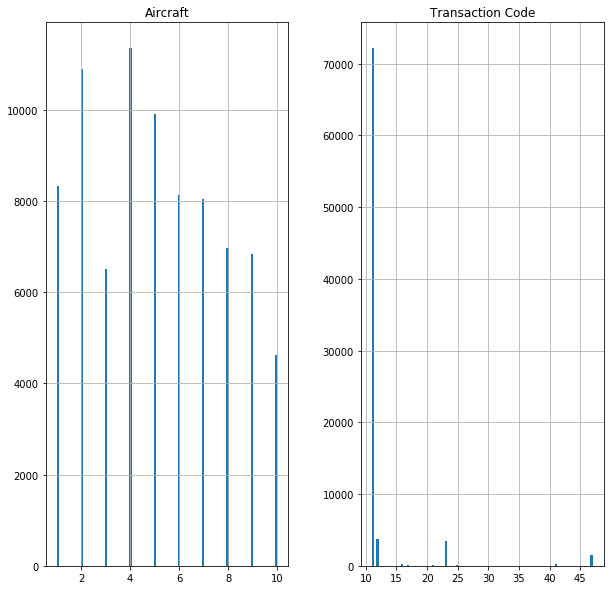

In [17]:
plt.rcParams['figure.figsize'] = 10,10
df.hist(bins=100);
plt.show()

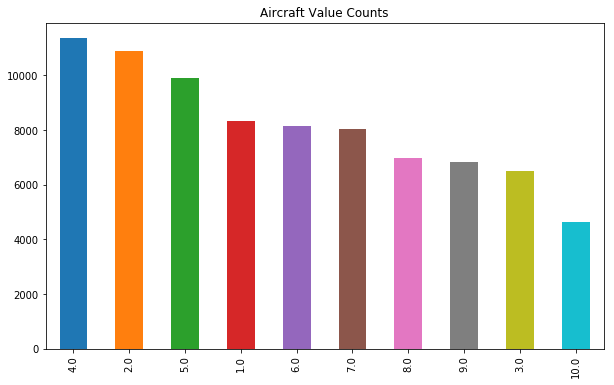

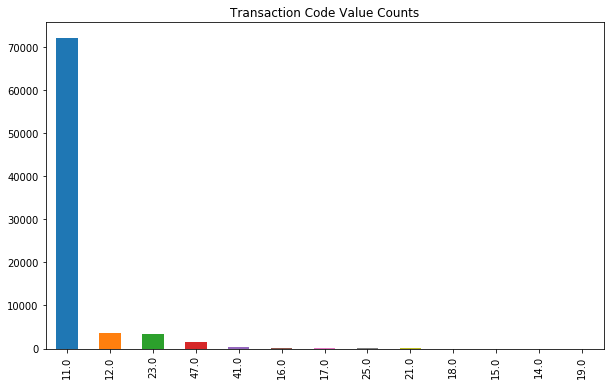

In [19]:
plt.rcParams['figure.figsize'] = 10,6
for col in ['Aircraft','Transaction Code']:
    df[col].value_counts().plot(kind='bar')
    plt.title(str(col)+ " Value Counts")
    plt.show()